In [1]:
import numpy as np
import pandas as pd
import random as rd
from collections import defaultdict
%pylab inline

Populating the interactive namespace from numpy and matplotlib


## Load Data 

In [153]:
train = pd.read_csv('data/train.csv')
train = train.set_index('ID')

Get a sample to play with if we need it

In [3]:
samp = train.loc[rd.sample(train.index, 5000)]

## EDA

In [157]:
# Variable types
vartypes = train.dtypes

# Divide into categories
cat_df = train.loc[:, vartypes[vartypes=='O'].index]
int_df = train.loc[:, vartypes[vartypes=='int64'].index]
float_df = train.loc[:, vartypes[vartypes=='float64'].index]


In [158]:
vartypes.value_counts()

int64      1405
float64     477
object       51
dtype: int64

### Categorical

The first thing we need to do is make a summary of all the categorical variables, so that we can figure out how to process them. Things I would like to look at:
- Number of unique values
- Frequency of top value
- Top Item
- Number of missing values
- First few examples
- Spread of target frequencies

In [5]:
from proc_functions import get_summary

# Replace nans
cat_df = cat_df.replace(np.nan, 'NA')

# Summarise each categorical variable
cat_df.apply(lambda col: get_summary(col, train['target'])).T

,Examples,Fraction Missing,Freq Range,NumUnique,Top Freq,Top Item
VAR_0001,"H, R, Q",0,0.06985867,3,0.5845377,R
VAR_0005,"C, B, N, S",0,0.117376,4,0.491968,B
VAR_0008,"False, NA",0,0.000404069,2,0.9996144,False
VAR_0009,"False, NA",0,0.000404069,2,0.9996144,False
VAR_0010,"False, NA",0,0.000404069,2,0.9996144,False
VAR_0011,"False, NA",0,0.000404069,2,0.9996144,False
VAR_0012,"False, NA",0,0.000404069,2,0.9996144,False
VAR_0043,"False, NA",0,0.000404069,2,0.9996144,False
VAR_0044,"[], NA",0,0.000404069,2,0.9996144,[]
VAR_0073,"NA, 04SEP12:00:00:00, 26JAN12:00:00:00, 18SEP1...",0,1,1459,0.6963183,NA


Use the above summaries to categorize the variables in the first part of process_categorical.py

In [24]:
from process_categorical import var_types

#### Dates
Start by converting all dates to the proper format

In [41]:
from process_categorical import convert_all_date_columns

date_df = convert_all_date_columns(train)
date_df.describe().T

,count,unique,top,freq,first,last
VAR_0073,44104,1458,2009-03-13 00:00:00,260,2008-01-02 00:00:00,2012-10-31 00:00:00
VAR_0075,145175,2371,2010-09-22 00:00:00,1168,2001-01-01 00:00:00,2012-11-01 00:00:00
VAR_0156,5870,730,2011-12-12 00:00:00,45,2008-04-11 00:00:00,2012-10-29 00:00:00
VAR_0157,920,424,2012-07-27 00:00:00,8,2008-10-17 00:00:00,2012-10-31 00:00:00
VAR_0158,2089,407,2012-06-01 00:00:00,28,2008-09-30 00:00:00,2012-10-29 00:00:00
VAR_0159,5870,650,2012-06-04 00:00:00,49,2008-09-23 00:00:00,2012-10-29 00:00:00
VAR_0166,14230,2145,2011-12-19 00:00:00,45,2002-07-30 00:00:00,2012-10-30 00:00:00
VAR_0167,2567,853,2011-11-03 00:00:00,27,2005-02-12 00:00:00,2012-10-30 00:00:00
VAR_0168,10725,1645,2011-11-03 00:00:00,206,1999-12-31 00:00:00,2012-11-01 00:00:00
VAR_0169,14230,1908,2011-12-19 00:00:00,48,2002-07-30 00:00:00,2012-11-01 00:00:00


Now do a little bit of feature engineering on dates
- Take all pairwise differences between dates
- Earliest date record
- Most recent date record
- Number of non-nan date records

In [124]:
from sklearn.preprocessing import Imputer
Imputer?

In [26]:
# Feature engineering on dates
from process_categorical import engineer_dates
diff_df = engineer_dates(date_df)
diff_df.describe().T

,count,mean,std,min,25%,50%,75%,max
VAR_0073-VAR_0075,44104,1 days 23:59:19.947251,505 days 21:33:52.319903,0 days 00:00:00,2 days 00:00:00,222 days 00:00:00,713 days 06:00:00,4281 days 00:00:00
VAR_0073-VAR_0156,5787,-13 days +04:55:22.719694,179 days 20:47:54.450964,-976 days +00:00:00,1 days 00:00:00,50 days 00:00:00,153 days 00:00:00,1488 days 00:00:00
VAR_0073-VAR_0157,901,34 days 19:25:06.326304,170 days 01:03:23.695355,-860 days +00:00:00,-11 days +00:00:00,19 days 00:00:00,56 days 00:00:00,1328 days 00:00:00
VAR_0073-VAR_0158,2043,-2 days +23:14:53.392070,184 days 02:25:14.461456,-1177 days +00:00:00,-61 days +12:00:00,19 days 00:00:00,94 days 00:00:00,1357 days 00:00:00
VAR_0073-VAR_0159,5787,-6 days +10:27:48.692982,146 days 11:25:39.359484,-976 days +00:00:00,0 days 00:00:00,22 days 00:00:00,79 days 00:00:00,1357 days 00:00:00
VAR_0073-VAR_0166,13646,-2 days +22:04:05.344246,583 days 18:45:27.032582,-1428 days +00:00:00,46 days 00:00:00,287 days 00:00:00,822 days 00:00:00,2893 days 00:00:00
VAR_0073-VAR_0167,2532,-27 days +08:36:25.694656,380 days 03:00:44.062032,-649 days +00:00:00,4 days 00:00:00,97 days 12:00:00,329 days 00:00:00,2792 days 00:00:00
VAR_0073-VAR_0168,10252,-2 days +06:12:57.276802,463 days 04:21:50.644763,-1429 days +00:00:00,0 days 00:00:00,98 days 00:00:00,407 days 00:00:00,4619 days 00:00:00
VAR_0073-VAR_0169,13646,-4 days +08:04:42.599072,444 days 01:24:06.607731,-1428 days +00:00:00,3 days 00:00:00,65 days 00:00:00,371 days 00:00:00,2893 days 00:00:00
VAR_0073-VAR_0176,16885,-6 days +23:17:29.796870,554 days 17:18:24.374012,-1428 days +00:00:00,28 days 00:00:00,192 days 00:00:00,689 days 00:00:00,2893 days 00:00:00


#### Geography Variables
- We should make a feature regarding whether the two state variables are the same or different
- It's important that this happens before processing 'thin' columns

In [8]:
from process_categorical import prep_geography
geo_df = pd.DataFrame(prep_geography(train))

## Feature Engineering II
- Many feature engineering steps require that we take into account a train/test split

In [29]:
from sklearn.cross_validation import train_test_split

# Train/test split
train_idx, test_idx = train_test_split(train.index, random_state=55)
train_df = train.loc[train_idx]
test_df = train.loc[test_idx]


#### Thin columns
- These columns are sliced too thin to be used as true categories (like categorizing people by social security number)
- Instead, we replace the significant ones with their p-values from a chisq test.
- We need a threshold for which p-values to actually include to avoid fitting accidental proportions (1 in 20 categories will be significant at the 95% level)

In [127]:
from process_categorical import ConvertZScore, var_types
zconv = ConvertZScore(thresh = 100)
zconv.fit(train.loc[train_idx, var_types['thin']], 
          train.loc[train_idx, 'target'])
thin_convert_df = zconv.transform(train[var_types['thin']])

/Users/zach/anaconda/lib/python2.7/site-packages/pandas/core/indexing.py:115: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
process_categorical.py:126: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
process_categorical.py:127: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/zach/anaconda/lib/python2.7/site-packages/pandas/core/indexing.py:415: SettingWithCopyWarning: 
A

In [128]:
thin_convert_df.describe()

,VAR_0200,VAR_0237,VAR_0274,VAR_0342,VAR_0404
count,145231.000000,145231.000000,145231.000000,145231.000000,145231.000000
mean,-2.274930,-0.464788,-0.324840,0.749388,0.857103
std,2.167009,5.712530,4.338991,4.440174,0.787501
min,-5.618387,-10.875701,-9.261083,-6.559297,-3.031424
25%,-3.670812,-5.639114,-2.459386,-2.717239,1.081618
50%,-3.670812,-0.498680,-0.383541,1.028530,1.081618
75%,-0.823965,4.807547,2.679500,2.448813,1.081618
max,5.066954,9.217493,7.424233,8.879391,1.081618


### One-Hot Encoding

In [130]:
from process_categorical import CategoryEncoder

straight = train.loc[train_idx, var_types['straightforward']]
enc = CategoryEncoder()
enc.fit(straight)
enc.transform(straight)

,0,1,2,3,4,5,6,7,8,9,...,58,59,60,61,62,63,64,65,66,67
ID,,,,,,,,,,,,,,,,,,,,,
56046,1,0,0,1,0,0,0,1,0,0,...,1,0,0,0,0,1,0,0,0,0
109912,0,1,0,0,1,0,0,1,0,0,...,1,0,0,0,0,0,1,0,0,0
78889,0,1,0,0,0,1,0,1,0,0,...,1,0,0,0,0,1,0,0,0,0
35730,0,1,0,0,0,1,0,1,0,0,...,0,1,0,0,0,1,0,0,0,0
37945,0,1,0,1,0,0,0,1,0,0,...,1,0,0,0,0,0,1,0,0,0
133055,0,1,0,0,0,0,1,1,0,0,...,1,0,0,0,0,0,0,1,0,0
114994,0,1,0,0,0,1,0,1,0,0,...,1,0,0,0,0,1,0,0,0,0
24316,0,1,0,0,0,1,0,1,0,0,...,1,0,0,0,0,1,0,0,0,0
48021,1,0,0,0,0,1,0,1,0,0,...,1,0,0,0,0,1,0,0,0,0


### Numeric Variables
I think there are not any actual float variables (non-integer) in the data. It looks like features with negative entries (just -1?) are being characterized as floats.

We should verify this, but then everything can be treated the same.

In [26]:
# Verify difference between integer and float

#### Integer
 
- Each integer valued variable needs to be checked to see if it should be treated as categorical or numerical
- It's possible these can all be taken care of, just by using trees
- If mutual information and linear correlation tell wildly different stories, then the integer may actually be a category. (For example, zip codes)

#### Are all the missing values (99, 999, etc..) in the same spot?

#### Float
- Float variables _should_ be the easiest---they can be taken at face value

Combine models from all three variable types

# Build a model

In [153]:
train = pd.read_csv('data/train.csv')
train = train.set_index('ID')

In [156]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score

# Training array
train_idx, test_idx = train_test_split(train.index, random_state=55)
X_train, X_test = prep_categorical(train, train_idx, test_idx)
y_train = train.loc[train_idx, 'target']
y_test = train.loc[test_idx, 'target']

# Model
rf = RandomForestClassifier(n_estimators=100, max_features=5)
rf.fit(X_train, y_train)

pred = rf.predict_proba(X_test)[:,1]
roc_auc_score(y_test, pred)

0.63563365102105951

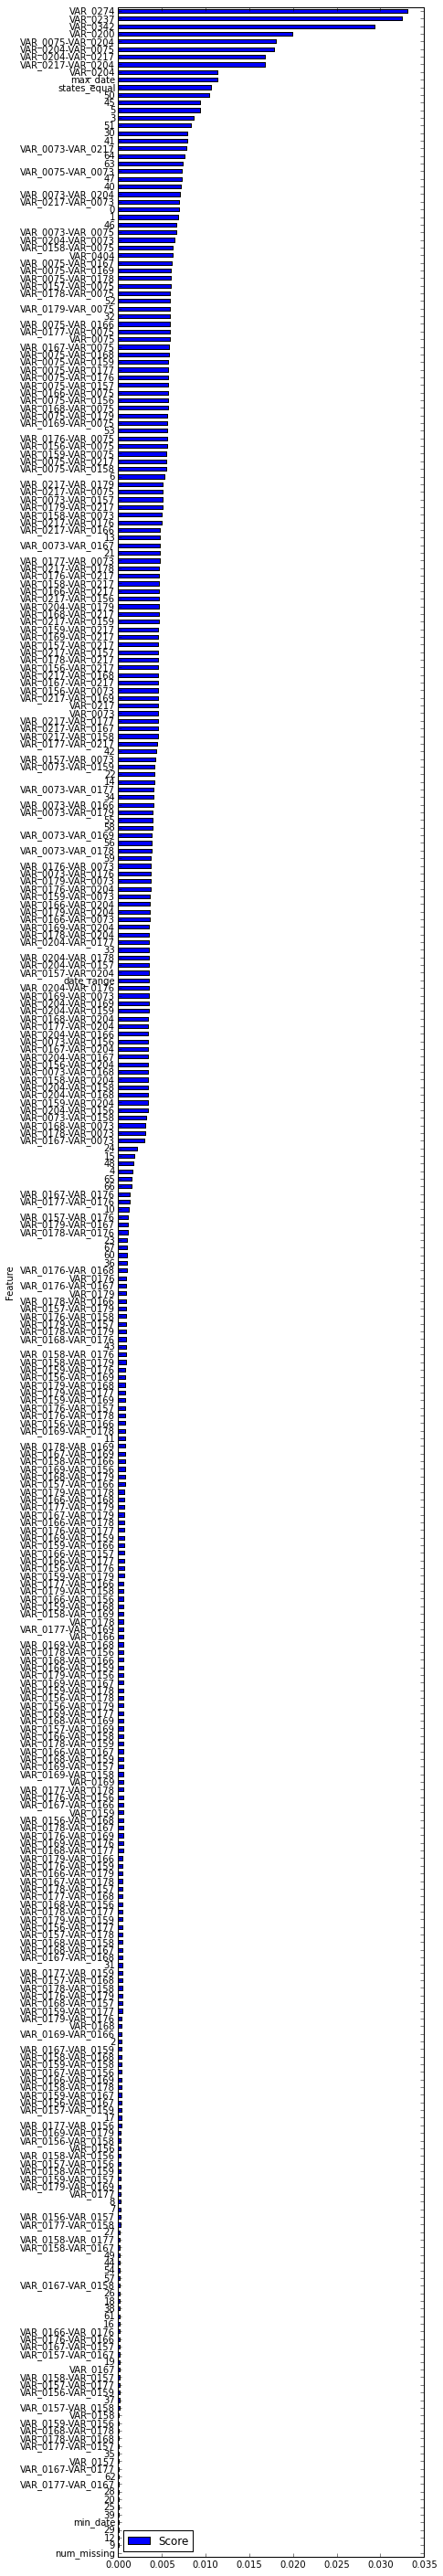

In [170]:
scores = pd.DataFrame({'Feature': X_train.columns,
                       'Score': rf.feature_importances_})
scores = scores.sort('Score', ascending=True).set_index('Feature')
scores.plot(kind='barh', figsize=(6,50))

In [169]:
X_train.columns

Index([u'VAR_0073', u'VAR_0075', u'VAR_0156', u'VAR_0157', u'VAR_0158',
       u'VAR_0159', u'VAR_0166', u'VAR_0167', u'VAR_0168', u'VAR_0169', 
       ...
                58,          59,          60,          61,          62,
                63,          64,          65,          66,          67],
      dtype='object', length=334)